## Example 1: Analysis of `Boston Housing Data`

Description of variables in Boston Housing dataset:

    CRIM: Crime rate
    ZN: Percentage of residential land zoned for lots over 25,000 ft 2
    INDUS: Percentage of land occupied by nonretail business
    CHAS: Does tract bound Charles River (= 1 if tract bounds river, = 0 otherwise)
    NOX: Nitric oxide concentration (parts per 10 million)
    RM: Average number of rooms per dwelling
    AGE: Percentage of owner-occupied units built prior to 1940
    DIS: Weighted distances to five Boston employment centers
    RAD: Index of accessibility to radial highways
    TAX: Full-value property tax rate per `$10,000`
    PTRATIO: Pupil-to-teacher ratio by town
    LSTAT: Percentage of lower status of the population
    MEDV: Median value of owner-occupied homes in `$1000s`    
    CAT.MEDV Is median value of owner-occupied homes in tract above $30,000 (CAT.MEDV = 1) or not (CAT.MEDV = 0)
    
Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset
housing_df = pd.read_csv("../datasets/BostonHousing.csv")

# Rename CAT.MEDV column for easier data handling
housing_df = housing_df.rename(columns={"CAT. MEDV": "CAT_MEDV"})
housing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


We consider three possible tasks:

1. A supervised predictive task, where the outcome variable of interest is the median value of a home in the tract (MEDV).
2. A supervised classification task, where the outcome variable of interest is the binary variable CAT.MEDV that indicates whetherthe home value is above or below \\$30,000.
3. An unsupervised task, where the goal is to cluster census tracts.

## Example 2: Ridership on Amtrak Trains

Amtrak, a US railway company, routinely collects data on ridership. Here, we focus on forecasting future ridership using the series of monthly ridership between January 1991 and March 2004.

In [3]:
## Load the Amtrack data and convert them to be suitable for time series analysis
amtrack_df = pd.read_csv("../datasets/Amtrak.csv", squeeze=True)
amtrack_df["Date"] = pd.to_datetime(amtrack_df.Month, format="%d/%m/%Y")
ridership_ts = pd.Series(amtrack_df.Ridership.values, index=amtrack_df.Date)
ridership_ts

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2003-11-01    2076.054
2003-12-01    2140.677
2004-01-01    1831.508
2004-02-01    1838.006
2004-03-01    2132.446
Length: 159, dtype: float64

## Basic Charts: Bar Charts, Line Charts and Scatter Plots

Pandas version:

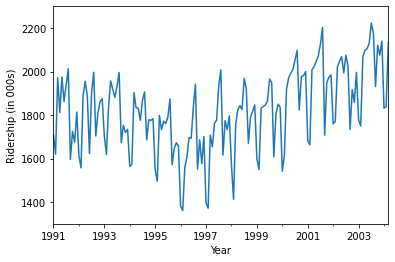

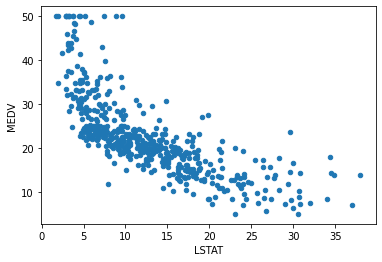

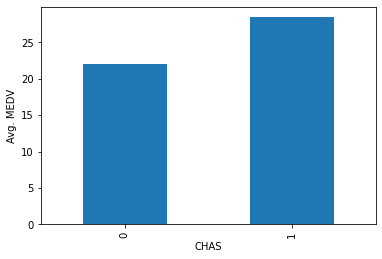

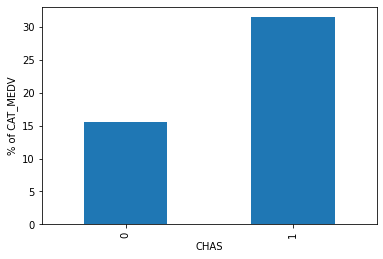

In [4]:
# line graph
ridership_ts.plot(ylim=[1300,  2300], legend=False)
# set x-axis and y-axis labels
plt.xlabel("Year")
plt.ylabel("Ridership (in 000s)")
plt.show()

# scatter plot with axes names
housing_df.plot.scatter(x="LSTAT", y="MEDV", legend=False)
plt.show()

# barchart of CHAS vs. MEDV
# by the mean MEDV per CHAS = (0, 1)
housing_df.groupby("CHAS").mean().MEDV.plot(kind="bar")
plt.ylabel("Avg. MEDV")
plt.show()

# barchart of CHAS vs. CAT_MEDV
data_for_plot = housing_df.groupby("CHAS").mean()["CAT_MEDV"] * 100
data_for_plot.plot(kind="bar")
plt.ylabel("% of CAT_MEDV")
plt.show()

matplolib version

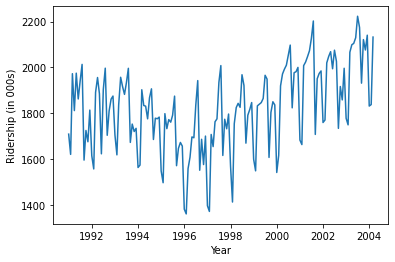

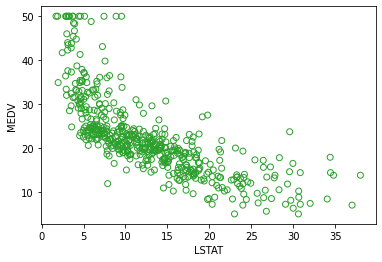

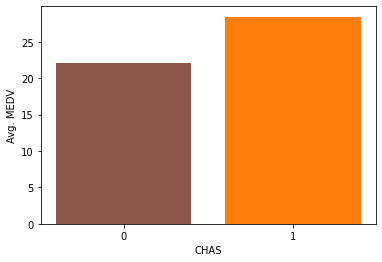

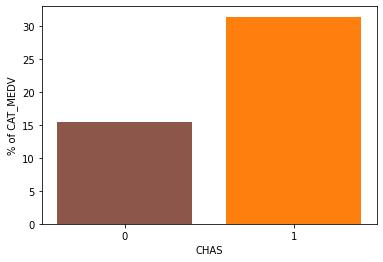

In [11]:
# line graph
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel("Year")
plt.ylabel("Ridership (in 000s)")
plt.show()

# Set the color of the points in the scatterplot and draw as open circles
plt.scatter(housing_df.LSTAT, housing_df.MEDV, color="C2", facecolor="None")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

# barchart of CHAS vs. mean MEDV
# compute mean MEDV per CHAS = (0, 1)
data_for_plot = housing_df.groupby("CHAS").mean().MEDV
fig, ax = plt.subplots()
ax.bar(data_for_plot.index, data_for_plot, color=["C5", "C1"])
ax.set_xticks([0, 1])
ax.set_xlabel("CHAS")
ax.set_ylabel("Avg. MEDV")
plt.show()

# barchart of CHAS vs. CAT.MEDV
data_for_plot = housing_df.groupby("CHAS").mean()["CAT_MEDV"] * 100
fig, ax = plt.subplots()
ax.bar(data_for_plot.index, data_for_plot, color=["C5", "C1"])
ax.set_xticks([0, 1])
ax.set_xlabel("CHAS")
ax.set_ylabel("% of CAT_MEDV")
plt.show()

## Distribution Plots: Boxplots and Histograms

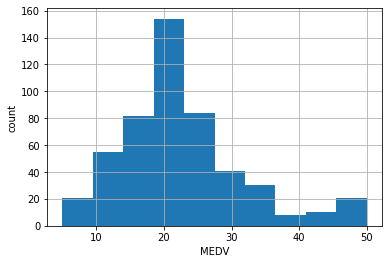

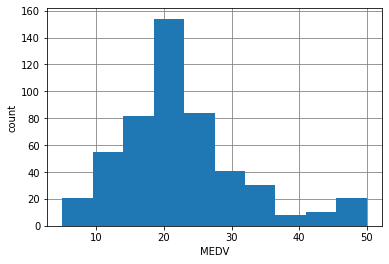

In [14]:
# histogram of MEDV
ax = housing_df.MEDV.hist()
ax.set_xlabel("MEDV")
ax.set_ylabel("count")
plt.show()

# alternative plot with maplotlib
fig, ax = plt.subplots()
ax.hist(housing_df.MEDV)
# show the grid lines behing the histogram
ax.set_axisbelow(True)
ax.grid(which="major", color="grey", linestyle="-")
ax.set_xlabel("MEDV")
ax.set_ylabel("count")
plt.show()

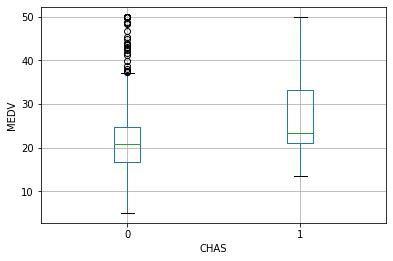

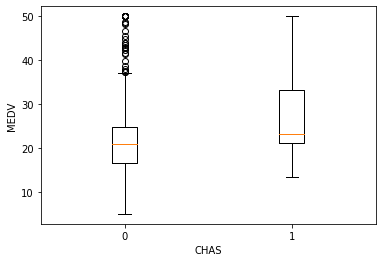

In [17]:
# boxplot of MEDV for different values of CHAS (0, 1)
ax = housing_df.boxplot(column="MEDV", by="CHAS")
ax.set_ylabel("MEDV")
# suppress the titles
plt.suptitle("")
plt.title("")
plt.show()

# alternative plot with matplotlib
data_for_plot = [list(housing_df[housing_df.CHAS == 0].MEDV),
                 list(housing_df[housing_df.CHAS == 1].MEDV)]
fig, ax = plt.subplots()
ax.boxplot(data_for_plot)
ax.set_xticks([1, 2])
ax.set_xticklabels([0, 1])
ax.set_xlabel("CHAS")
ax.set_ylabel("MEDV")
plt.show()